In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Use the inspector to find the names of the columns in the measurement table and their types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Use the inspector to find the names of the columns in the station table and their types
columns = inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Find the most recent date in the data set.
newest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
newest_date

('2017-08-23')

<AxesSubplot:xlabel='Date', ylabel='Inches'>

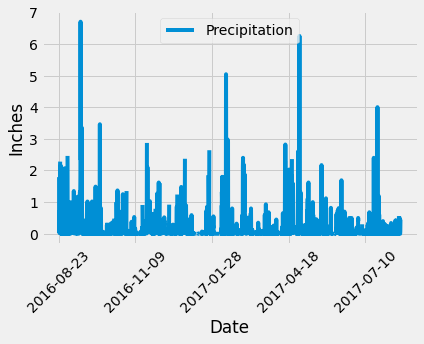

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.datetime(2017, 8, 23) - dt.timedelta(days=366)

# Perform a query to retrieve the date and precipitation scores
last_year = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).all()
last_year

# Save the query results as a Pandas DataFrame and set the index to the date column
recent_year_df = pd.DataFrame(last_year, columns=['Date', 'Precipitation']).set_index('Date')

# Sort the dataframe by date
recent_year_df = recent_year_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
recent_year_df.plot(rot=45, ylabel='Inches')

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
recent_year_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
station_num = session.query(Station.station).count()
station_num

9

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest,
# and average temperature.
active_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                                func.avg(Measurement.tobs)).\
                                filter(Measurement.station == 'USC00519281').first()
print(f"""The most active station, USC00519281, has a min temperature of {active_stats[0]}, a 
max temperature of {active_stats[1]}, and an average temperature of {round(active_stats[2], 2)}.
""")

The most active station, USC00519281, has a min temperature of 54.0, a 
max temperature of 85.0, and an average temperature of 71.66.



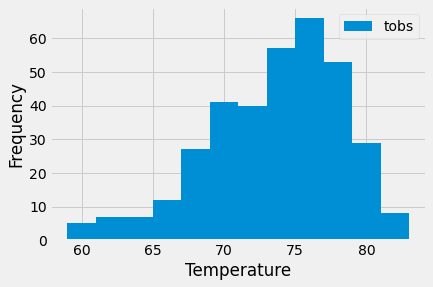

In [78]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results 
# as a histogram
active_year = [a for (a,) in session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= year_ago).all()]

plt.hist(x=active_year, label='tobs', bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Close session

In [79]:
# Close Session
session.close()